## DATA422 Group Project

### Population Data

In [1]:
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.1.1       √ purrr   0.3.2  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### 1. Read Source files

In [2]:
households = read.csv(file = 'Households_totalNZ-wide_format_updated_16-7-20.csv')
individual = read.csv(file = 'Individual_part1_totalNZ-wide_format_updated_16-7-20.csv')

### 2. Select Useful Rows

In [3]:
households = households %>%
select(Area_code, 
       Area_description, 
       Census_2006_total_households_in_occupied_private_dwellings, 
       Census_2013_total_households_in_occupied_private_dwellings,
       Census_2018_total_households_in_occupied_private_dwellings
      )
households %>% head()

Area_code,Area_description,Census_2006_total_households_in_occupied_private_dwellings,Census_2013_total_households_in_occupied_private_dwellings,Census_2018_total_households_in_occupied_private_dwellings
7000000,7000000,51,51,60
7000001,7000001,39,42,36
7000002,7000002,0,0,0
7000003,7000003,72,66,75
7000004,7000004,36,42,54
7000005,7000005,39,54,60


In [4]:
individual = individual %>%
select(Area_code, 
       Area_description, 
       Census_2006_usually_resident_population_count, 
       Census_2013_usually_resident_population_count,
       Census_2018_usually_resident_population_count
       )
individual %>% head()

Area_code,Area_description,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count
7000000,7000000,165,144,141
7000001,7000001,93,105,114
7000002,7000002,0,0,0
7000003,7000003,216,171,225
7000004,7000004,90,102,138
7000005,7000005,111,144,174


### 3. Join Data (Combine Datasets "Individual" & "Household")

In [5]:
combined <- merge(households,individual,by=c("Area_code","Area_description"))
combined %>% head(10)

Area_code,Area_description,Census_2006_total_households_in_occupied_private_dwellings,Census_2013_total_households_in_occupied_private_dwellings,Census_2018_total_households_in_occupied_private_dwellings,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count
001,Far North District,19947,21369,22761,55845,55734,65250
00101,Te Hiku Ward,6381,6732,7029,17520,17478,20310
00102,Bay of Islands-Whangaroa Ward,9012,9909,10899,24663,25284,30009
00103,Kaikohe-Hokianga Ward,4554,4728,4833,13665,12972,14931
002,Whangarei District,27615,29778,32745,74463,76995,90960
00201,Mangakahia-Maungatapere Ward,1737,2028,2304,5016,5556,6687
00202,Hikurangi-Coastal Ward,3783,4293,4686,10734,11559,13626
00203,Whangarei Heads Ward,2058,2313,2646,5478,5991,7248
00204,Denby Ward,6468,6864,7485,18018,18141,21462
00205,Okara Ward,9753,9777,10260,24855,24135,27453


### 4. Get Christchurch Suburbs

[List of Christchurch Suburbs on Wikipedia](https://en.wikipedia.org/wiki/Christchurch)

In [6]:
Mairehau<- subset(combined, Area_code %in% c(321700, 323100))
Linwood<- subset(combined, Area_code %in% c(327900,328500,329300))
St_Martins<- subset(combined, Area_code %in% c(330800))
Addington<- subset(combined, Area_code %in% c(326100, 327400))
Fendalton<- subset(combined, Area_code %in% c(321500,322400))
St_Albans<- subset(combined, Area_code %in% c(322100,322200,323800,323900,324800))
Shirley<- subset(combined, Area_code %in% c(323400, 324600))
Phillipstown<- subset(combined, Area_code %in% c(328900))
Beckenham<- subset(combined, Area_code %in% c(330600))
Riccarton<- subset(combined, Area_code %in% c(323200,323300,324400,325200))
Bryndwr <- subset(combined, Area_code %in% c(319900,320800,320600))
Edgeware<- subset(combined, Area_code %in% c(325300))
Dallington<- subset(combined, Area_code %in% c(326500))
Woolston<- subset(combined, Area_code %in% c(330100,330500,331000,331100))
Sydenham<- subset(combined, Area_code %in% c(328700, 329400,329700))
Ilam<- subset(combined, Area_code %in% c(320200,320700,321200))
Strowan<- subset(combined, Area_code %in% c(321400))
Richmond<- subset(combined, Area_code %in% c(325900,326800))
Opawa<- subset(combined, Area_code %in% c(330900))
Somerfield<- subset(combined, Area_code %in% c(329100, 329200))
Upper_Riccarton<- subset(combined, Area_code %in% c(322000,321800,322700))
Merivale<- subset(combined, Area_code %in% c(323000,322600))
Avonside<- subset(combined, Area_code %in% c(327800))
Waltham<- subset(combined, Area_code %in% c(329900, 329600))
Spreydon<- subset(combined, Area_code %in% c(326900,327600,328200))
Burnside<- subset(combined, Area_code %in% c(319200,318300,317500))
Papanui<- subset(combined, Area_code %in% c(319400,320100,320900))
Halswell<- subset(combined, Area_code %in% c(324500,327300,328000))
Broomfield<- subset(combined, Area_code %in% c(318700))
Ferrymead<- subset(combined, Area_code %in% c(331800))
Islington<- subset(combined, Area_code %in% c(318200))
Northwood<- subset(combined, Area_code %in% c(317400,316800))
Yaldhurst<- subset(combined, Area_code %in% c(316600))
Avonhead<- subset(combined, Area_code %in% c(318500,318900,319500,319700))
Bromley<- subset(combined, Area_code %in% c(330400))
Wigram<- subset(combined, Area_code %in% c(321900,322500,322800,322900,323600,324100,324700))
Avondale<- subset(combined, Area_code %in% c(327500))
New_Brighton<- subset(combined, Area_code %in% c(330200,328300))
Hornby<- subset(combined, Area_code %in% c(320300,321100))
Sockburn<- subset(combined, Area_code %in% c(321000))
Bishopdale<- subset(combined, Area_code %in% c(317800,318000,319000))

Marshland<- subset(combined, Area_code %in% c(318400))
Aranui<- subset(combined, Area_code %in% c(328600))
Styx<- subset(combined, Area_code %in% c(317200))
Wainoni<- subset(combined, Area_code %in% c(328400))
Kennedys_Bush<- subset(combined, Area_code %in% c(329000))
Burwood<- subset(combined, Area_code %in% c(325600,324000))
South_New_Brighton<- subset(combined, Area_code %in% c(331700))
Heathcote_Valley<- subset(combined, Area_code %in% c(331900))
Oaklands<- subset(combined, Area_code %in% c(324300,326300))
Parklands<- subset(combined, Area_code %in% c(325100,321600,323700))
Hillsborough<- subset(combined, Area_code %in% c(331400))
Russley<- subset(combined, Area_code %in% c(317700))
Belfast<- subset(combined, Area_code %in% c(316900,317300))
Prestons<- subset(combined, Area_code %in% c(321300))
Brooklands<- subset(combined, Area_code %in% c(7024285))
Harewood<- subset(combined, Area_code %in% c(317000))
Huntsbury<- subset(combined, Area_code %in% c(331200))
Mount_Pleasant<- subset(combined, Area_code %in% c(332000))
Waimairi_Beach<- subset(combined, Area_code %in% c(326000))
Redcliffs<- subset(combined, Area_code %in% c(332100))
Cashmere<- subset(combined, Area_code %in% c(330300,331300))
Westmorland<- subset(combined, Area_code %in% c(330000))
Middleton<- subset(combined, Area_code %in% c(323500))
Northcote<- subset(combined, Area_code %in% c(320500))
Casebrook<- subset(combined, Area_code %in% c(317900))
Hoon_Hay<- subset(combined, Area_code %in% c(326700,327700,329500))
Clifton<- subset(combined, Area_code %in% c(332400))
North_New_Brighton<- subset(combined, Area_code %in% c(327200))
Hillmorton<- subset(combined, Area_code %in% c(325000))
Redwood<- subset(combined, Area_code %in% c(318600,318800,319600))
Hei_Hei<- subset(combined, Area_code %in% c(319300))
Aidanfield<- subset(combined, Area_code %in% c(325400))
Sumner<- subset(combined, Area_code %in% c(332700))


### 5. Sample Suburb Inspection

In [7]:
data.frame(colSums(St_Albans[,3:8]))

,colSums.St_Albans...3.8..
Census_2006_total_households_in_occupied_private_dwellings,5379
Census_2013_total_households_in_occupied_private_dwellings,5223
Census_2018_total_households_in_occupied_private_dwellings,5448
Census_2006_usually_resident_population_count,12987
Census_2013_usually_resident_population_count,12768
Census_2018_usually_resident_population_count,13137


### 6. Reframe into a Summary Table

In [8]:
population = rbind(data.frame(suburb="Mairehau",Mairehau[1,c(3:8)] + Mairehau[2,c(3:8)]),
                   data.frame(suburb="Linwood",Linwood[1,c(3:8)] + Linwood[2,c(3:8)]),
                   data.frame(suburb="St Martins",St_Martins[c(3:8)]),
                   data.frame(suburb="Addington",Addington[1,c(3:8)] + Addington[2,c(3:8)]),
                   data.frame(suburb="Fendalton",Fendalton[1,c(3:8)] + Fendalton[2,c(3:8)]),
                   data.frame(suburb="St Albans",St_Albans[1,c(3:8)] + St_Albans[2,c(3:8)]+St_Albans[3,c(3:8)] + St_Albans[4,c(3:8)]+St_Albans[5,c(3:8)]),
                   data.frame(suburb="Shirley",Shirley[1,c(3:8)] + Shirley[2,c(3:8)]),
                   data.frame(suburb="Phillipstown",Phillipstown[c(3:8)]),
                   data.frame(suburb="Beckenham",Beckenham[c(3:8)]),
                   data.frame(suburb="Riccarton",Riccarton[1,c(3:8)] + Riccarton[2,c(3:8)]+Riccarton[3,c(3:8)] + Riccarton[4,c(3:8)]),
                   data.frame(suburb="Bryndwr",Bryndwr[1,c(3:8)] + Bryndwr[2,c(3:8)]+Bryndwr[3,c(3:8)]),
                   data.frame(suburb="Edgeware",Edgeware[c(3:8)]),
                   data.frame(suburb="Dallington",Dallington[c(3:8)]),
                   data.frame(suburb="Woolston",Woolston[1,c(3:8)] + Woolston[2,c(3:8)]+Woolston[3,c(3:8)] + Woolston[4,c(3:8)]),
                   data.frame(suburb="Sydenham",Sydenham[1,c(3:8)] + Sydenham[2,c(3:8)]+Sydenham[3,c(3:8)]),
                   data.frame(suburb="Ilam",Ilam[1,c(3:8)] + Ilam[2,c(3:8)]+Ilam[3,c(3:8)]),
                   data.frame(suburb="Strowan",Strowan[c(3:8)]),
                   data.frame(suburb="Richmond",Richmond[1,c(3:8)] + Richmond[2,c(3:8)]),
                   data.frame(suburb="Opawa",Opawa[c(3:8)]),
                   data.frame(suburb="Somerfield",Somerfield[1,c(3:8)] + Somerfield[2,c(3:8)]),
                   data.frame(suburb="Upper Riccarton",Upper_Riccarton[1,c(3:8)] + Upper_Riccarton[2,c(3:8)]+Upper_Riccarton[3,c(3:8)]),
                   data.frame(suburb="Merivale",Merivale[1,c(3:8)] + Merivale[2,c(3:8)]),
                   data.frame(suburb="Avonside",Avonside[c(3:8)]),
                   data.frame(suburb="Waltham",Waltham[1,c(3:8)] + Waltham[2,c(3:8)]),
                   data.frame(suburb="Spreydon",Spreydon[1,c(3:8)] + Spreydon[2,c(3:8)]),
                   data.frame(suburb="Burnside",Burnside[1,c(3:8)] + Burnside[2,c(3:8)]),
                   data.frame(suburb="Papanui",Papanui[1,c(3:8)] + Papanui[2,c(3:8)]),
                   data.frame(suburb="Halswell",Halswell[1,c(3:8)] + Halswell[2,c(3:8)]+Halswell[3,c(3:8)]),
                   data.frame(suburb="Broomfield",Broomfield[c(3:8)]),
                   data.frame(suburb="Ferrymead",Ferrymead[c(3:8)]),
                   data.frame(suburb="Islington",Islington[c(3:8)]),
                   data.frame(suburb="Northwood",Northwood[1,c(3:8)] + Northwood[2,c(3:8)]),
                   data.frame(suburb="Yaldhurst",Yaldhurst[c(3:8)]),
                   data.frame(suburb="Avonhead",Avonhead[1,c(3:8)] + Avonhead[2,c(3:8)]+Avonhead[3,c(3:8)] + Avonhead[4,c(3:8)]),
                   data.frame(suburb="Bromley",Bromley[c(3:8)]),
                   data.frame(suburb="Wigram",Wigram[1,c(3:8)]+Wigram[2,c(3:8)]+Wigram[3,c(3:8)] + Wigram[4,c(3:8)]+Wigram[5,c(3:8)]+Wigram[6,c(3:8)]+Wigram[7,c(3:8)]),
                   data.frame(suburb="Avondale",Avondale[c(3:8)]),
                   data.frame(suburb="New Brighton",New_Brighton[1,c(3:8)] + New_Brighton[2,c(3:8)]),
                   data.frame(suburb="Hornby",Hornby[1,c(3:8)] + Hornby[2,c(3:8)]),
                   data.frame(suburb="Sockburn",Sockburn[c(3:8)]),
                   data.frame(suburb="Bishopdale",Bishopdale[1,c(3:8)] + Bishopdale[2,c(3:8)]+Bishopdale[3,c(3:8)]),
                   data.frame(suburb="Marshland",Marshland[c(3:8)]),
                   data.frame(suburb="Aranui",Aranui[c(3:8)]),
                   data.frame(suburb="Styx",Styx[c(3:8)]),
                   data.frame(suburb="Wainoni",Wainoni[c(3:8)]),
                   data.frame(suburb="Kennedys Bush",Kennedys_Bush[c(3:8)]),
                   data.frame(suburb="Burwood",Burwood[1,c(3:8)] + Burwood[2,c(3:8)]),
                   data.frame(suburb="South New Brighton",South_New_Brighton[c(3:8)]),
                   data.frame(suburb="Heathcote Valley",Heathcote_Valley[c(3:8)]),
                   data.frame(suburb="Oaklands",Oaklands[1,c(3:8)] + Oaklands[2,c(3:8)]),
                   data.frame(suburb="Parklands",Parklands[1,c(3:8)] + Parklands[2,c(3:8)]+Parklands[3,c(3:8)]),
                   data.frame(suburb="Hillsborough",Hillsborough[c(3:8)]),
                   data.frame(suburb="Russley",Russley[c(3:8)]),
                   data.frame(suburb="Belfast",Belfast[1,c(3:8)] + Belfast[2,c(3:8)]),
                   data.frame(suburb="Prestons",Prestons[c(3:8)]),
                   data.frame(suburb="Brooklands",Brooklands[c(3:8)]),
                   data.frame(suburb="Harewood",Harewood[c(3:8)]),
                   data.frame(suburb="Huntsbury",Huntsbury[c(3:8)]),
                   data.frame(suburb="Mt Pleasant",Mount_Pleasant[c(3:8)]),
                   data.frame(suburb="Waimairi Beach",Waimairi_Beach[c(3:8)]),
                   data.frame(suburb="Redcliffs",Redcliffs[c(3:8)]),
                   data.frame(suburb="Cashmere",Cashmere[1,c(3:8)] + Cashmere[2,c(3:8)]),
                   data.frame(suburb="Westmorland",Westmorland[c(3:8)]),
                   data.frame(suburb="Middleton",Middleton[c(3:8)]),
                   data.frame(suburb="Northcote",Northcote[c(3:8)]),
                   data.frame(suburb="Casebrook",Casebrook[c(3:8)]),
                   data.frame(suburb="Hoon Hay",Hoon_Hay[1,c(3:8)] + Hoon_Hay[2,c(3:8)]+Hoon_Hay[3,c(3:8)]),
                   data.frame(suburb="Clifton",Clifton[c(3:8)]),
                   data.frame(suburb="North New Brighton",North_New_Brighton[c(3:8)]),
                   data.frame(suburb="Hillmorton",Hillmorton[c(3:8)]),
                   data.frame(suburb="Redwood",Redwood[1,c(3:8)] + Redwood[2,c(3:8)]+Redwood[3,c(3:8)]),
                   data.frame(suburb="Hei Hei",Hei_Hei[c(3:8)]),
                   data.frame(suburb="Aidanfield",Aidanfield[c(3:8)]),
                   data.frame(suburb="Sumner",Sumner[c(3:8)])
                   )
population %>% head()

,suburb,Census_2006_total_households_in_occupied_private_dwellings,Census_2013_total_households_in_occupied_private_dwellings,Census_2018_total_households_in_occupied_private_dwellings,Census_2006_usually_resident_population_count,Census_2013_usually_resident_population_count,Census_2018_usually_resident_population_count
2183,Mairehau,2199,2388,2547,5781,6510,6870
2245,Linwood,3060,2847,3105,7134,6696,7671
2274,St Martins,1134,1071,1107,2751,2652,2721
2227,Addington,1758,1845,1986,4287,5031,5346
2181,Fendalton,1653,1617,1656,4737,4578,4515
2187,St Albans,5379,5223,5448,12987,12768,13137


### 7. Rename Variables

In [9]:
names(population)[names(population) == 'Census_2006_total_households_in_occupied_private_dwellings'] <- 'population_households_2006'
names(population)[names(population) == 'Census_2013_total_households_in_occupied_private_dwellings'] <- 'population_households_2013'
names(population)[names(population) == 'Census_2018_total_households_in_occupied_private_dwellings'] <- 'population_households_2018'
names(population)[names(population) == 'Census_2006_usually_resident_population_count'] <- 'population_individuals_2006'
names(population)[names(population) == 'Census_2013_usually_resident_population_count'] <- 'population_individuals_2013'
names(population)[names(population) == 'Census_2018_usually_resident_population_count'] <- 'population_individuals_2018'

In [10]:
population %>% head()

,suburb,population_households_2006,population_households_2013,population_households_2018,population_individuals_2006,population_individuals_2013,population_individuals_2018
2183,Mairehau,2199,2388,2547,5781,6510,6870
2245,Linwood,3060,2847,3105,7134,6696,7671
2274,St Martins,1134,1071,1107,2751,2652,2721
2227,Addington,1758,1845,1986,4287,5031,5346
2181,Fendalton,1653,1617,1656,4737,4578,4515
2187,St Albans,5379,5223,5448,12987,12768,13137


### 8. Estimate Population 2021

In [11]:
population_final <- population %>% 
  mutate(
      population_households_estimate_2021 = round((((population_households_2018/population_households_2013)^(1/5)
                                              +(population_households_2013/population_households_2006)^(1/7))/2)
      *population_households_2018,digits=0),
      population_individuals_estimate_2021 = round((((population_individuals_2018/population_individuals_2013)^(1/5)
                                               +(population_individuals_2013/population_individuals_2006)^(1/7))/2)
      *population_individuals_2018,digits=0)
  )
head = population_final %>% head()
head

suburb,population_households_2006,population_households_2013,population_households_2018,population_individuals_2006,population_individuals_2013,population_individuals_2018,population_households_estimate_2021,population_individuals_estimate_2021
Mairehau,2199,2388,2547,5781,6510,6870,2579,6966
Linwood,3060,2847,3105,7134,6696,7671,3116,7742
St Martins,1134,1071,1107,2751,2652,2721,1106,2721
Addington,1758,1845,1986,4287,5031,5346,2008,5440
Fendalton,1653,1617,1656,4737,4578,4515,1657,4498
St Albans,5379,5223,5448,12987,12768,13137,5460,13159


### 9. Sort by Population 

In [12]:
population_sorted_individual = population_final[order(population_final$population_individuals_estimate_2021), ]
population_sorted_individual$suburb <- factor(population_sorted_individual$suburb, levels = population_sorted_individual$suburb)

population_sorted_individual %>%
    head()

,suburb,population_households_2006,population_households_2013,population_households_2018,population_individuals_2006,population_individuals_2013,population_individuals_2018,population_households_estimate_2021,population_individuals_estimate_2021
56,Brooklands,387,180,42,1080,531,129,35,107
64,Middleton,63,69,69,174,213,189,69,190
42,Marshland,258,252,258,783,759,789,258,790
46,Kennedys Bush,228,288,321,684,849,906,330,926
31,Islington,336,363,366,810,906,969,368,983
30,Ferrymead,390,396,390,1071,1017,1074,390,1076


In [13]:
population_sorted_household = population_final[order(population_final$population_households_estimate_2021), ]
population_sorted_household$suburb <- factor(population_sorted_household$suburb, levels = population_sorted_household$suburb)

population_sorted_household %>%
    head()

,suburb,population_households_2006,population_households_2013,population_households_2018,population_individuals_2006,population_individuals_2013,population_individuals_2018,population_households_estimate_2021,population_individuals_estimate_2021
56,Brooklands,387,180,42,1080,531,129,35,107
64,Middleton,63,69,69,174,213,189,69,190
42,Marshland,258,252,258,783,759,789,258,790
46,Kennedys Bush,228,288,321,684,849,906,330,926
31,Islington,336,363,366,810,906,969,368,983
30,Ferrymead,390,396,390,1071,1017,1074,390,1076


### 10. Number of Suburbs Obtained

In [14]:
population_final %>% nrow()

[1] 74

### 11. Data Visualisation

In [15]:
library(ggplot2)

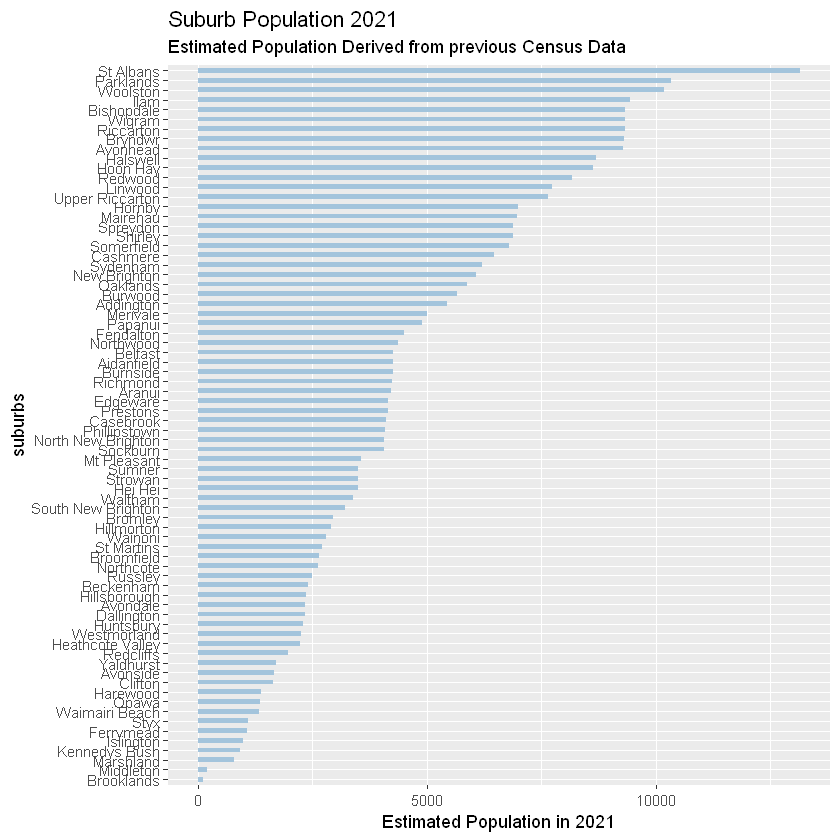

In [16]:
ggplot(population_sorted_individual, aes(x=suburb, y=population_individuals_estimate_2021)) + 
  geom_bar(stat="identity", width=.5,fill="#a3c4dc")  +
  labs(x = 'suburbs',y='Estimated Population in 2021',subtitle="Estimated Population Derived from previous Census Data", 
       title= "Suburb Population 2021") + 
  coord_flip()

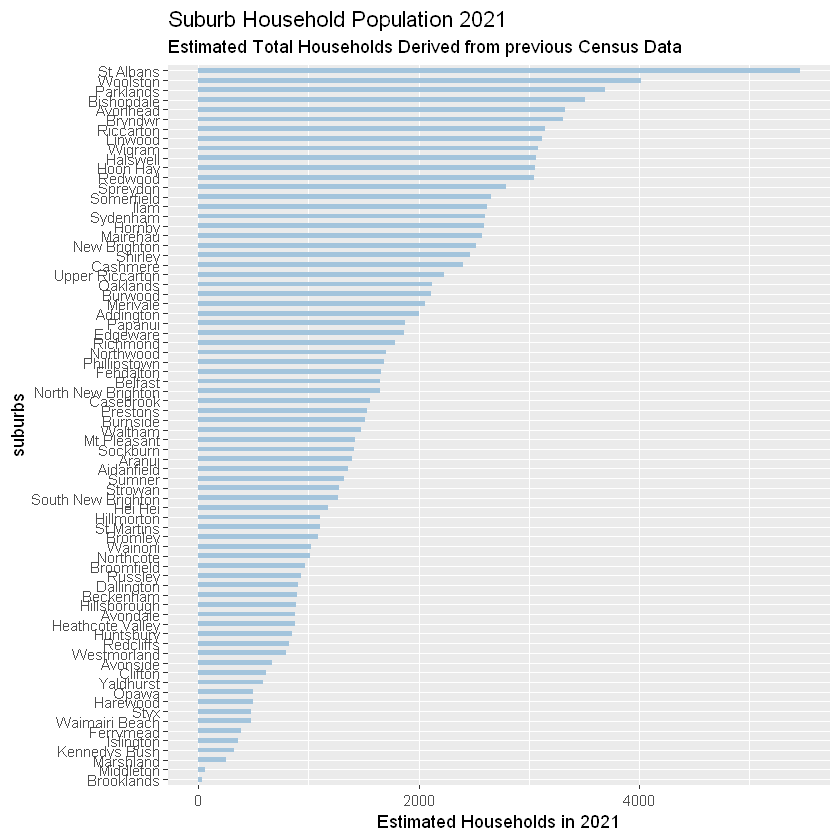

In [17]:
ggplot(population_sorted_household, aes(x=suburb, y=population_households_estimate_2021)) + 
  geom_bar(stat="identity", width=.5,fill="#a3c4dc")  +
  labs(x = 'suburbs',y='Estimated Households in 2021',subtitle="Estimated Total Households Derived from previous Census Data", 
       title= "Suburb Household Population 2021") + 
  coord_flip()

### 12. Output Results to CSV

In [18]:
population_final %>% write.csv(file = 'suburb_level_population_summary.csv')